# Testing AWS Braket configuration

In [16]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker

t = Tracker().start()

In [ ]:
import boto3
import matplotlib.pyplot as plt

from braket.aws import AwsDevice, AwsQuantumTask
from braket.circuits import Circuit
from braket.devices import LocalSimulator

### 1. Using Local Simulator

In [20]:

device = LocalSimulator()
bell = Circuit().h(0).cnot(0, 1)
print(bell)
print('\n')
counts = device.run(bell, shots=100).result().measurement_counts
print(counts)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


Counter({'00': 50, '11': 50})


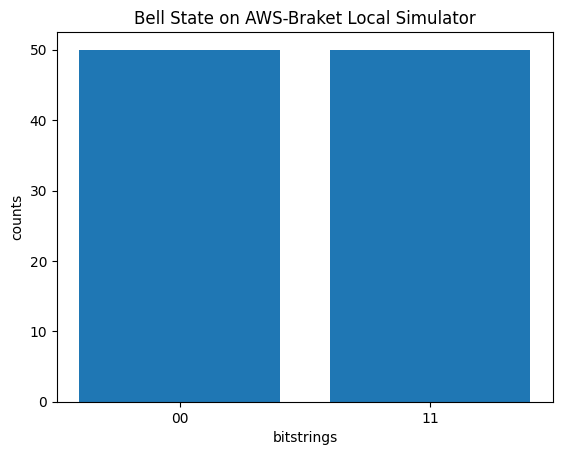

In [25]:
plt.bar(counts.keys(), counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")
plt.title("Bell State on AWS-Braket Local Simulator");

### 2. Using Managed/AWS Simulator

In [ ]:
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

# # Choose S3 bucket to store results
# bucket = "aws-braket-pj"
# prefix = "results/"
# s3_folder = (bucket, prefix)

bell = Circuit().h(0).cnot(0, 1)
task = device.run(bell, shots=100)
# task = device.run(bell, s3_folder, shots=100)
dist = task.result().measurement_counts

print(dist)

Counter({'11': 63, '00': 37})


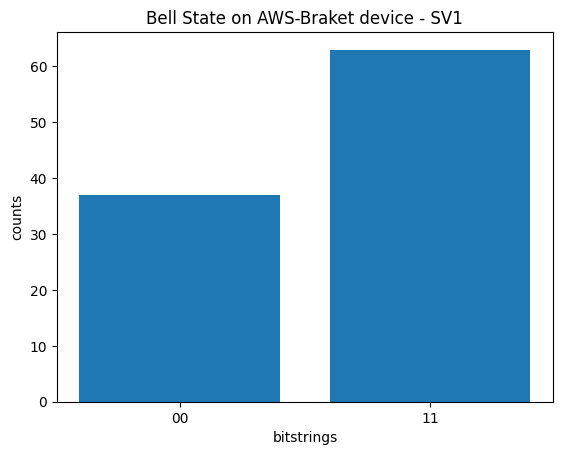

In [29]:
plt.bar(dist.keys(), dist.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")
plt.title("Bell State on AWS-Braket device - " + device.name);

### 3. Running on Acual device

In [ ]:
device = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet")

bell = Circuit().h(0).cnot(0, 1)
task = device.run(bell)
task_id = task.id

In [ ]:
# Recover quantum task

# task_id = "arn:aws:braket:eu-north-1:615299756142:quantum-task/00521444-42b1-4c0d-8a2d-bff3bb212532"
task_loaded = AwsQuantumTask(arn=task_id)
print(f"Task ID: {task_id}")
status = task_loaded.state()
print(f"Task status: {status}")
pos = task_loaded.queue_position().queue_position
print(f"Queue position: {pos}")
# task.cancel()

if status == 'COMPLETED':
    # get results
    results = task_loaded.result()
    # get all metadata of submitted task
    metadata = task_loaded.metadata()
    # example for metadata
    shots = metadata['shots']
    machine = metadata['deviceArn']
    # print example metadata
    print("{} shots taken on machine {}.".format(shots, machine))
    # get measurement counts
    counts = results.measurement_counts
    print('Measurement counts:', counts)

Task ID: arn:aws:braket:us-west-1:615299756142:quantum-task/8599d782-0b37-419e-8cbc-b57e82b6a3f8
Task status: COMPLETED
Queue position: None


100 shots taken on machine arn:aws:braket:::device/quantum-simulator/amazon/sv1.
Measurement counts: Counter({'11': 63, '00': 37})


In [37]:
print(counts)

Counter({'11': 63, '00': 37})


In [ ]:
plt.bar(counts.keys(), counts.values())
plt.xlabel("bitstrings")
plt.ylabel("counts")
plt.title("Bell State on AWS-Braket device - " + device.name);

***Cost Estimate to Run this Notebook - provided by Braket SDK Cost Tracking***

In [38]:
print("Quantum Task Summary")
print(t.quantum_tasks_statistics())
print(
    "Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2)."
)
print(
    f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.2f} USD"
)

Quantum Task Summary
{}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.00 USD
